In [69]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [70]:
import warnings 
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('mtcars.csv')
df = df.set_index('model')  ## As because each data is for unique model.

In [72]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [73]:
df1 = df.copy()

###### We will perform everything on df1 so that our old data remains safe.

#### Step1 : Create Linear Regression Model

In [74]:
X = df1.drop('mpg',axis=1)
y = df1.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           3.79e-07
Time:                        13:33:46   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 : Construct residual Plot

In [75]:
#residual plot
sns.set(style = 'whitegrid')

df1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

model
Mazda RX4             -1.599506
Mazda RX4 Wag         -1.111886
Datsun 710            -3.450644
Hornet 4 Drive         0.162595
Hornet Sportabout      1.006566
Valiant               -2.283039
Duster 360            -0.086256
Merc 240D              1.903988
Merc 230              -1.619090
Merc 280               0.500970
Merc 280C             -1.391654
Merc 450SE             2.227838
Merc 450SL             1.700426
Merc 450SLC           -0.542225
Cadillac Fleetwood    -1.634013
Lincoln Continental   -0.536438
Chrysler Imperial      4.206371
Fiat 128               4.627094
Honda Civic            0.503261
Toyota Corolla         4.387631
Toyota Corona         -2.143103
Dodge Challenger      -1.443053
AMC Javelin           -2.532181
Camaro Z28            -0.006022
Pontiac Firebird       2.508321
Fiat X1-9             -0.993469
Porsche 914-2         -0.152954
Lotus Europa           2.763727
Ford Pantera L        -3.070041
Ferrari Dino           0.006172
Maserati Bora          1.058882
Vo

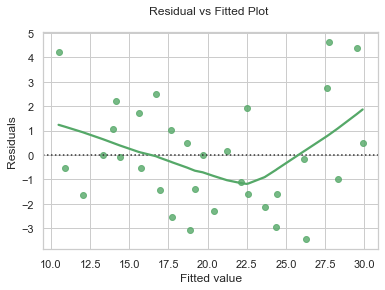

In [76]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

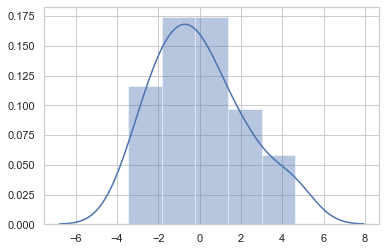

In [77]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

#### Step 3 : If the residual plot is normal then compute the R2 value, do not transform. If it is not normal then go for transformation. As, here the residual plot is normal so no need of transformation.

###### If suppose this residual plot have not been normal then we would have gone with transformation techniques. Let's see few transformation techniques.

In [78]:
## old data
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [79]:
## for sqrt(X)
df2 = df.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,4.582576,2.449490,12.649111,10.488088,1.974842,1.618641,4.057093,0.0,1.0,2.000000,2.000000
Mazda RX4 Wag,4.582576,2.449490,12.649111,10.488088,1.974842,1.695582,4.125530,0.0,1.0,2.000000,2.000000
Datsun 710,4.774935,2.000000,10.392305,9.643651,1.962142,1.523155,4.313931,1.0,1.0,2.000000,1.000000
Hornet 4 Drive,4.626013,2.449490,16.062378,10.488088,1.754993,1.793042,4.409082,1.0,0.0,1.732051,1.000000
Hornet Sportabout,4.324350,2.828427,18.973666,13.228757,1.774824,1.854724,4.125530,0.0,0.0,1.732051,1.414214


#### Step 4 : Apply Regression

In [80]:
X = final_df.drop('mpg',axis=1)
y = final_df.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     18.47
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           3.11e-08
Time:                        13:33:46   Log-Likelihood:                 4.8558
No. Observations:                  32   AIC:                             12.29
Df Residuals:                      21   BIC:                             28.41
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0388      3.845      0.790      0.438      -4.957      11.034
cyl            0.1843      0.489      0.377      0.710      -0.833       1.201
disp           0.0009      0.055      0.017      0.987      -0.114       0.116
hp            -0.0563      0.052     -1.074      0.295      -0.165       0.053
drat           0.2678      0.646      0.415      0.683      -1.076       1.611
wt            -1.3366      0.691     -1.935      0.067      -2.773       0.100
qsec           0.6293      0.670      0.939      0.358      -0.764       2.023
vs            -0.0492      0.204     -0.241      0.812      -0.474       0.376
am             0.0885      0.209      0.422      0.677      -0.347       0.524
gear           0.5699      0.592      0.963      0.347      -0.661       1.801
carb          -0.1876      0.284     -0.661      0.516      -0.778       0.402
==============================================================================
Omnibus:                        2.325   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.112
Skew:                           0.576   Prob(JB):                        0.348
Kurtosis:                       2.493   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#residual plot
sns.set(style = 'whitegrid')

df2['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

model
Mazda RX4             -0.100734
Mazda RX4 Wag         -0.040957
Datsun 710            -0.295215
Hornet 4 Drive         0.112749
Hornet Sportabout      0.176816
Valiant               -0.211805
Duster 360             0.013838
Merc 240D              0.197366
Merc 230              -0.089635
Merc 280               0.045090
Merc 280C             -0.161459
Merc 450SE             0.169325
Merc 450SL             0.148829
Merc 450SLC           -0.124367
Cadillac Fleetwood    -0.225802
Lincoln Continental   -0.149326
Chrysler Imperial      0.478351
Fiat 128               0.407031
Honda Civic           -0.013962
Toyota Corolla         0.322627
Toyota Corona         -0.208387
Dodge Challenger      -0.194152
AMC Javelin           -0.325657
Camaro Z28            -0.029948
Pontiac Firebird       0.378176
Fiat X1-9             -0.142433
Porsche 914-2         -0.059280
Lotus Europa           0.184197
Ford Pantera L        -0.242525
Ferrari Dino           0.015754
Maserati Bora          0.111660
Vo

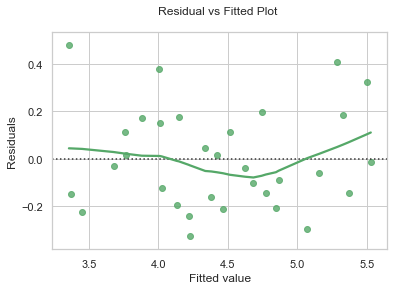

In [82]:
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

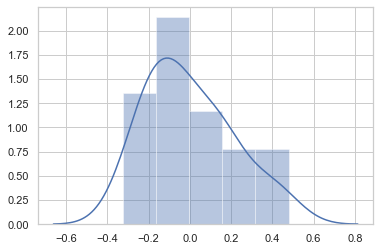

In [83]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

### Generally we use transformation when the residual plots vary from the normal distribution.

##### Let's see few more transformation techniques

##### log transform

In [85]:
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,3.044522,1.791759,5.075174,4.700480,1.360977,0.963174,2.800933,-inf,0.0,1.386294,1.386294
Mazda RX4 Wag,3.044522,1.791759,5.075174,4.700480,1.360977,1.056053,2.834389,-inf,0.0,1.386294,1.386294
Datsun 710,3.126761,1.386294,4.682131,4.532599,1.348073,0.841567,2.923699,0.0,0.0,1.386294,0.000000
Hornet 4 Drive,3.063391,1.791759,5.552960,4.700480,1.124930,1.167827,2.967333,0.0,-inf,1.098612,0.000000
Hornet Sportabout,2.928524,2.079442,5.886104,5.164786,1.147402,1.235471,2.834389,-inf,-inf,1.098612,0.693147


##### Inverse transform

In [86]:
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,0.047619,0.166667,0.006250,0.009091,0.256410,0.381679,0.060753,inf,1.0,0.250000,0.25
Mazda RX4 Wag,0.047619,0.166667,0.006250,0.009091,0.256410,0.347826,0.058754,inf,1.0,0.250000,0.25
Datsun 710,0.043860,0.250000,0.009259,0.010753,0.259740,0.431034,0.053735,1.0,1.0,0.250000,1.00
Hornet 4 Drive,0.046729,0.166667,0.003876,0.009091,0.324675,0.311042,0.051440,1.0,inf,0.333333,1.00
Hornet Sportabout,0.053476,0.125000,0.002778,0.005714,0.317460,0.290698,0.058754,inf,inf,0.333333,0.50


##### exponential transform

In [89]:
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.exp(X))
df_final1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,1.318816e+09,403.428793,3.069850e+69,5.920972e+47,49.402449,13.735724,1.407626e+07,1.000000,2.718282,54.598150,54.598150
Mazda RX4 Wag,1.318816e+09,403.428793,3.069850e+69,5.920972e+47,49.402449,17.725424,2.464292e+07,1.000000,2.718282,54.598150,54.598150
Datsun 710,7.978370e+09,54.598150,8.013164e+46,2.451246e+40,46.993063,10.175674,1.208427e+08,2.718282,2.718282,54.598150,2.718282
Hornet 4 Drive,1.967442e+09,403.428793,1.116802e+112,5.920972e+47,21.758402,24.903292,2.771308e+08,2.718282,1.000000,20.085537,2.718282
Hornet Sportabout,1.322229e+08,2980.957987,2.218265e+156,1.003539e+76,23.336065,31.186958,2.464292e+07,1.000000,1.000000,20.085537,7.389056


In [90]:
X = df_final1.drop('mpg',axis=1)
y = df_final1.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                      -0.052
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                      -inf
Date:                Fri, 16 Aug 2019   Prob (F-statistic):                nan
Time:                        13:40:58   Log-Likelihood:                -1075.6
No. Observations:                  32   AIC:                             2153.
Df Residuals:                      31   BIC:                             2155.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
cyl                 0          0        nan        nan           0           0
disp       3.386e-201          0        inf      0.000   3.39e-201   3.39e-201
hp         1.075e-260          0        inf      0.000   1.07e-260   1.07e-260
drat                0          0        nan        nan           0           0
wt                  0          0        nan        nan           0           0
qsec                0          0        nan        nan           0           0
vs                  0          0        nan        nan           0           0
am                  0          0        nan        nan           0           0
gear                0          0        nan        nan           0           0
carb                0          0        nan        nan           0           0
==============================================================================
Omnibus:                       72.228   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.568
Skew:                           5.027   Prob(JB):                    1.54e-199
Kurtosis:                      27.199   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""